In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('FastFoodNutritionMenu.csv')
data.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1159 non-null   object
 1   Item                  1159 non-null   object
 2   Calories              1157 non-null   object
 3   Calories from
Fat     1098 non-null   object
 4   Total Fat
(g)         1101 non-null   object
 5   Saturated Fat
(g)     1101 non-null   object
 6   Trans Fat
(g)         1101 non-null   object
 7   Cholesterol
(mg)      1157 non-null   object
 8   Sodium 
(mg)          1157 non-null   object
 9   Carbs
(g)             1101 non-null   object
 10  Fiber
(g)             1101 non-null   object
 11  Sugars
(g)            1157 non-null   object
 12  Protein
(g)           1027 non-null   object
 13  Weight Watchers
Pnts  524 non-null    object
dtypes: object(14)
memory usage: 126.9+ KB


In [5]:
null_counts = data.isnull().sum()
print(null_counts)

Company                    0
Item                       0
Calories                   2
Calories from\nFat        61
Total Fat\n(g)            58
Saturated Fat\n(g)        58
Trans Fat\n(g)            58
Cholesterol\n(mg)          2
Sodium \n(mg)              2
Carbs\n(g)                58
Fiber\n(g)                58
Sugars\n(g)                2
Protein\n(g)             132
Weight Watchers\nPnts    635
dtype: int64


In [6]:
data.dtypes

Company                  object
Item                     object
Calories                 object
Calories from\nFat       object
Total Fat\n(g)           object
Saturated Fat\n(g)       object
Trans Fat\n(g)           object
Cholesterol\n(mg)        object
Sodium \n(mg)            object
Carbs\n(g)               object
Fiber\n(g)               object
Sugars\n(g)              object
Protein\n(g)             object
Weight Watchers\nPnts    object
dtype: object

In [7]:
columns_to_convert = [ 'Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)', 'Weight Watchers\nPnts'] 
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [8]:
data.dtypes

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [9]:
company_counts = data.groupby('Company').size()
print(company_counts)

Company
Burger King    199
KFC            218
McDonald’s     330
Pizza Hut       74
Taco Bell      183
Wendy’s        155
dtype: int64


In [10]:
data_mac = data[data['Company'].str.contains("McDonald")]
data_KFC = data[data['Company'].str.contains("KFC")]
data_Burger_King = data[data['Company'].str.contains("Burger King")]
data_Wendy = data[data['Company'].str.contains("Wendy")]
data_Pizza = data[data['Company'].str.contains("Pizza")]
data_taco = data[data['Company'].str.contains("Taco")]

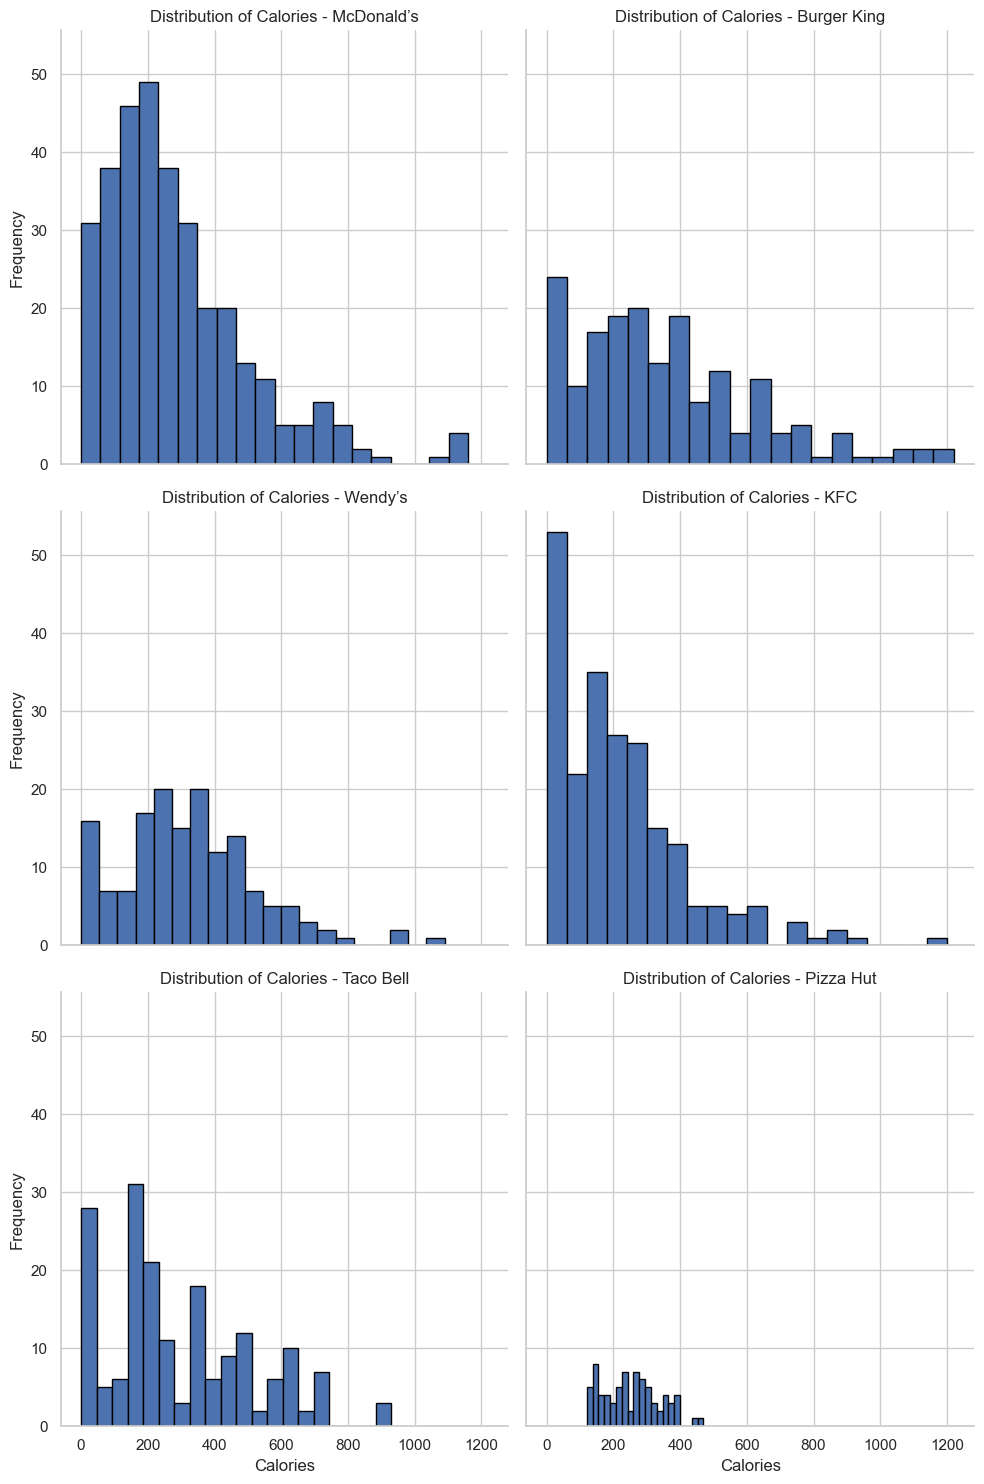

In [13]:
sns.set(style="whitegrid")

g = sns.FacetGrid(data, col="Company", col_wrap=2, height=5)

g.map(plt.hist, 'Calories', bins=20, edgecolor='black')

g.set_titles("Distribution of Calories - {col_name}")
g.set_axis_labels("Calories", "Frequency")

plt.tight_layout()
plt.show()

In [12]:
import plotly.subplots as sp
import plotly.graph_objs as go

companies = data['Company'].unique()

fig = sp.make_subplots(rows=len(companies), cols=1, subplot_titles=companies)

for i, company in enumerate(companies):
    company_data = data[data['Company'] == company]
    histogram = go.Histogram(x=company_data['Calories'], nbinsx=20)
    fig.add_trace(histogram, row=i+1, col=1)

    fig.update_xaxes(title_text='Calories', row=i+1, col=1)
    fig.update_yaxes(title_text='Frequency', row=i+1, col=1)

fig.update_layout(height=len(companies) * 300, showlegend=False, title='Distribution of Calories by Company')
fig.show()

In [13]:
import plotly.express as px

nutritional_columns = ['Total Fat\n(g)', 'Protein\n(g)', 'Carbs\n(g)']
fig = px.box(data, x='Company', y=nutritional_columns, title='Nutritional Values by Company',
             labels={'value': 'Grams'}, category_orders={'Company': companies})
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': companies},
                  xaxis_title='Company', yaxis_title='Grams')

fig.show()

In [14]:
companies = data['Company'].unique()

fig = sp.make_subplots(rows=len(companies), cols=1, shared_xaxes=True, vertical_spacing=0.05)

for i, company in enumerate(companies, 1):
    company_df = data[data['Company'] == company]
    
    scatter = go.Scatter(x=company_df['Calories'], y=company_df['Total Fat\n(g)'],
                         mode='markers', name=company)
    
    fig.add_trace(scatter, row=i, col=1)

fig.update_layout(height=500 * len(companies), title='Calories vs. Total Fat by Company',
                  xaxis_title='Calories', yaxis_title='Total Fat (g)')
    
fig.show()

/tmp/ipykernel_20/3869401732.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



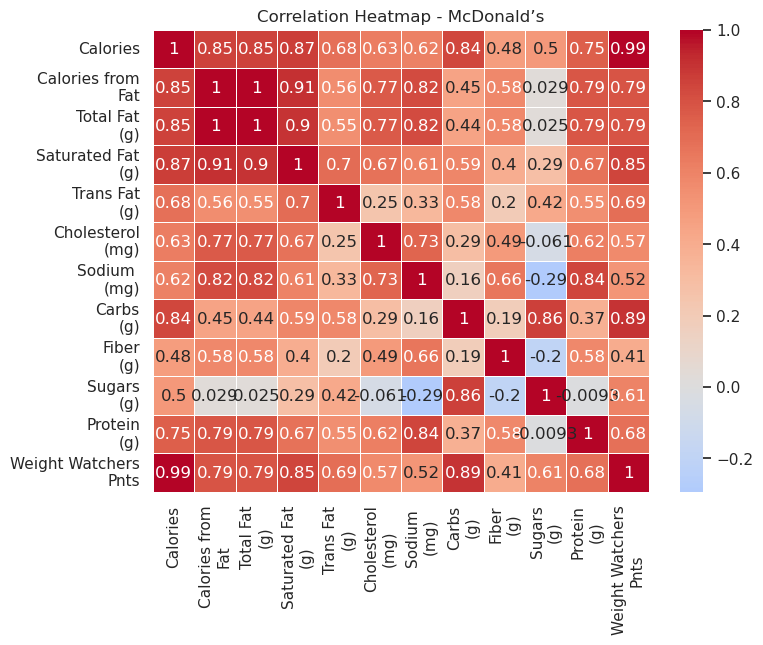

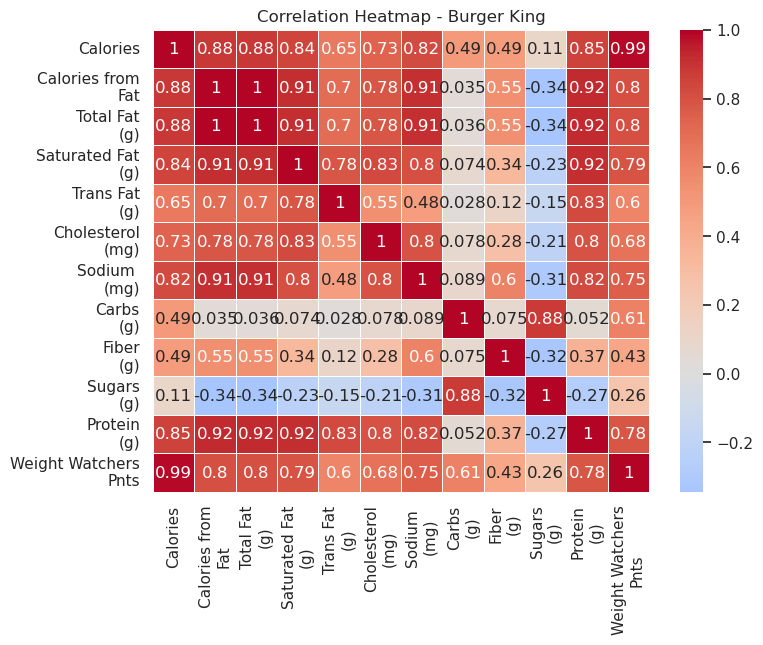

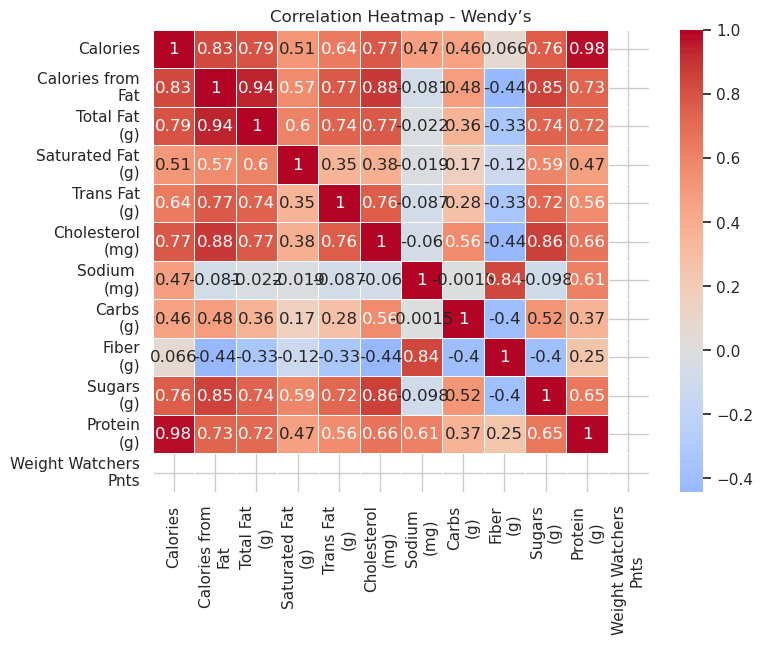

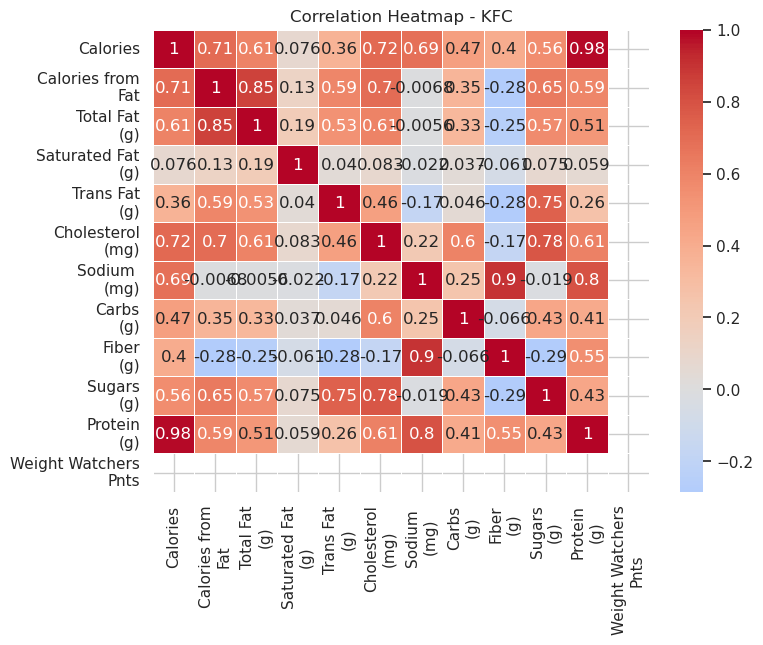

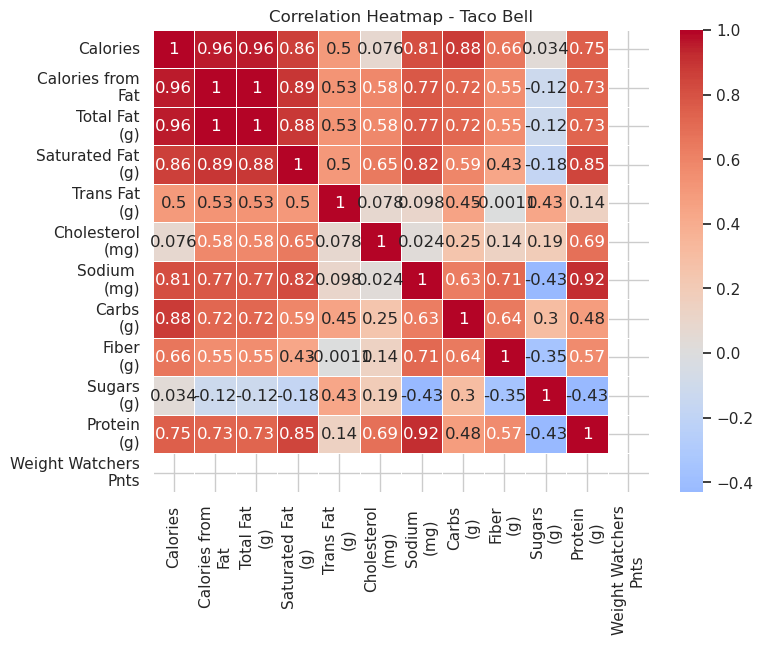

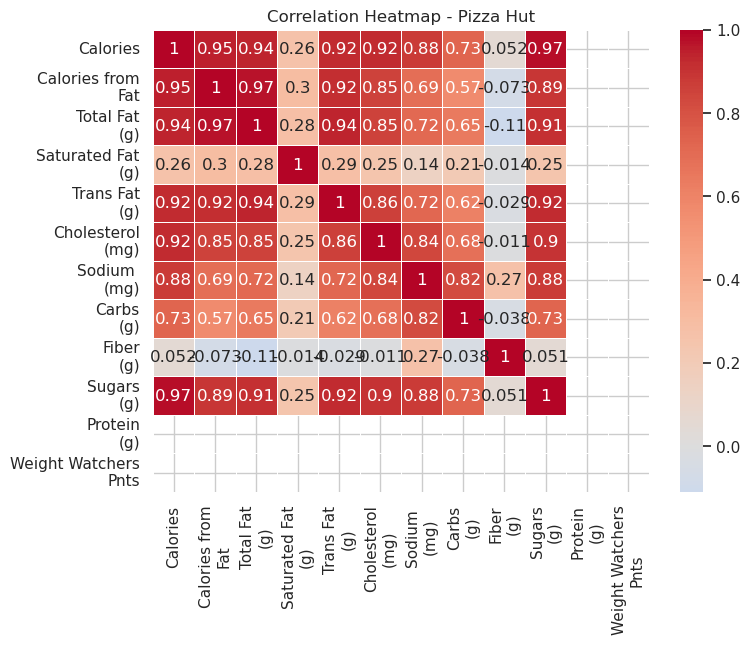

In [15]:
def plot_correlation_heatmaps_by_company(dataframe):
    
    companies = data['Company'].unique()
    
    for company in companies:
        company_df = data[data['Company'] == company]
        corr_matrix = company_df.corr()
        
        plt.figure(figsize=(8, 6))
        
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
        
        plt.title(f'Correlation Heatmap - {company}')
        plt.show()

plot_correlation_heatmaps_by_company(data)

In [16]:
healthiness_factors = {
    'Total Fat\n(g)': 0.2,
    'Saturated Fat\n(g)': 0.3,
    'Trans Fat\n(g)': 0.5,
    'Cholesterol\n(mg)': -0.2,
    'Sodium \n(mg)': -0.3,
    'Fiber\n(g)': 0.4,
    'Protein\n(g)': 0.3
}

data['Healthiness Score'] = data[healthiness_factors.keys()].dot(pd.Series(healthiness_factors))

print(data.head())

      Company                           Item  Calories  Calories from\nFat  \
0  McDonald’s                      Hamburger     250.0                80.0   
1  McDonald’s                   Cheeseburger     300.0               110.0   
2  McDonald’s            Double Cheeseburger     440.0               210.0   
3  McDonald’s                       McDouble     390.0               170.0   
4  McDonald’s   Quarter Pounder® with Cheese     510.0               230.0   

   Total Fat\n(g)  Saturated Fat\n(g)  Trans Fat\n(g)  Cholesterol\n(mg)  \
0             9.0                 3.5             0.5               25.0   
1            12.0                 6.0             0.5               40.0   
2            23.0                11.0             1.5               80.0   
3            19.0                 8.0             1.0               65.0   
4            26.0                12.0             1.5               90.0   

   Sodium \n(mg)  Carbs\n(g)  Fiber\n(g)  Sugars\n(g)  Protein\n(g)  \
0  

In [17]:
data.isnull().sum()

Company                    0
Item                       0
Calories                  26
Calories from\nFat        83
Total Fat\n(g)            80
Saturated Fat\n(g)        81
Trans Fat\n(g)            87
Cholesterol\n(mg)         33
Sodium \n(mg)             27
Carbs\n(g)                92
Fiber\n(g)                91
Sugars\n(g)               34
Protein\n(g)             154
Weight Watchers\nPnts    655
Healthiness Score        173
dtype: int64

In [18]:
data_filled = data.fillna(data.mean())
print(data_filled.head())

      Company                           Item  Calories  Calories from\nFat  \
0  McDonald’s                      Hamburger     250.0                80.0   
1  McDonald’s                   Cheeseburger     300.0               110.0   
2  McDonald’s            Double Cheeseburger     440.0               210.0   
3  McDonald’s                       McDouble     390.0               170.0   
4  McDonald’s   Quarter Pounder® with Cheese     510.0               230.0   

   Total Fat\n(g)  Saturated Fat\n(g)  Trans Fat\n(g)  Cholesterol\n(mg)  \
0             9.0                 3.5             0.5               25.0   
1            12.0                 6.0             0.5               40.0   
2            23.0                11.0             1.5               80.0   
3            19.0                 8.0             1.0               65.0   
4            26.0                12.0             1.5               90.0   

   Sodium \n(mg)  Carbs\n(g)  Fiber\n(g)  Sugars\n(g)  Protein\n(g)  \
0  

/tmp/ipykernel_20/1737744143.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data_filled.drop(columns=['Item', 'Company'])
y = data_filled['Item']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.02586206896551724
